In [200]:
#!pip install matplotlib==3.4.3
#!pip install --upgrade statsmodels

In [201]:
# Importing the necessary packages
import numpy as np                                  # "Scientific computing"
import scipy.stats as stats                         # Statistical tests

import random
import math

import pandas as pd                                 # Data Frame
from pandas.api.types import CategoricalDtype

import matplotlib.pyplot as plt                     # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic diagram
import seaborn as sns                               # Advanced data visualisation
import altair as alt                                # Alternative visualisation system

from statsmodels.graphics.mosaicplot import mosaic

### Exercise 1

The file lightbulbs.csv contains a random sample of
100 lightbulb lifetimes. The company that produces
these lightbulbs wants to know whether it can claim
that its lightbulbs typically last more than 1000 burning
hours.
1. Identify the null and alternative hypotheses for this
situation.
2. Can this lightbulb manufacturer claim that its
lightbulbs typically last more than 1000 hours at
the 5% significance level? What about at the 1%
significance level?


In [202]:
df = pd.read_csv('https://raw.githubusercontent.com/HoGentTIN/dsai-en-labs/main/data/Lightbulbs.csv', sep=";")
df.head()

,Lightbulb,Lifetime
0,1,840.08
1,2,960.00
2,3,953.38
3,4,981.14
4,5,938.66


H0 : µ = µ0

H1 = µ > µ0

In [203]:
sm = df.Lifetime.mean()
print(sm)
ss = df.Lifetime.std()
print(ss)
m0 = 1000
n = 100


991.0186000000001
87.16791333507943


In [204]:
p = stats.t.sf(sm, loc=m0, scale=ss/np.sqrt(n), df=n-1)
print("p-value: %.12f" % p)
if(p < 0.05):
    print("p < a: reject H0")
else:
    print("p > a: do not reject H0")

p-value: 0.847323245110
p > a: do not reject H0


In [205]:
p = stats.t.sf(sm, loc=m0, scale=ss/np.sqrt(n), df=n-1)
print("p-value: %.12f" % p)
if(p < 0.01):
    print("p < a: reject H0")
else:
    print("p > a: do not reject H0")

p-value: 0.847323245110
p > a: do not reject H0


### Exercise 2

The file Low calorie soft drinks.csv categorizes 250 randomly
selected consumers on the basis of their gender, their
age, and their preference for our brand or a competitor's
brand of a low-calorie soft drink.   
First make a stacked barplot.  
Then use a test to see whether the drink
preference is independent of gender.

In [206]:
df = pd.read_csv('https://raw.githubusercontent.com/HoGentTIN/dsai-en-labs/main/data/Low%20calorie%20soft%20drinks.csv', sep=";")
df.head()

,Consumer,Gender,Age,Preference
0,1,F,Over 60,Our brand
1,2,F,Between 40 and 60,Our brand
2,3,M,Between 40 and 60,Our brand
3,4,F,Over 60,Competing brand
4,5,M,Between 20 and 40,Our brand


<AxesSubplot:xlabel='Gender'>

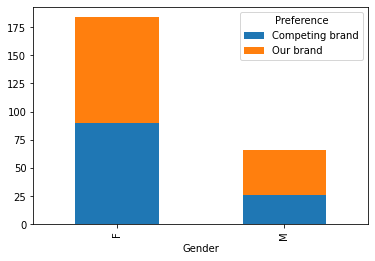

In [207]:
df.groupby(['Gender', 'Preference']).size().unstack().plot(kind='bar', stacked=True)

In [208]:
observed = pd.crosstab(df.Gender, df.Preference)
chi2, p, df, expected = stats.chi2_contingency(observed)

print("Chi-squared       : %.4f" % chi2)
print("Degrees of freedom: %d" % df)
print("P-value           : %.4f" % p)


Chi-squared       : 1.4078
Degrees of freedom: 1
P-value           : 0.2354


In [209]:
cramers_v = np.sqrt(chi2 / (df * 250))
print(f'CramerV: {cramers_v}')

CramerV: 0.07504061630265782


geen verband

# Exercise 3
The owner of Original Italian Pizza restaurant chain
wants to understand which variable most strongly
influences the sales of his specialty deep-dish
pizza. He has gathered data on the monthly sales of
deep-dish pizzas at his restaurants and observations on
other potentially relevant variables for each of several
outlets in central Indiana. These data are provided in
the file pizzas.csv. Estimate a simple linear regression
equation between the quantity sold (Y) and each
of the following candidates for the best explanatory
variable: average price of deep-dish pizzas, monthly
advertising expenditures, and disposable income per
household in the areas surrounding the outlets. Which
variable is most strongly associated with the number
of pizzas sold? Explain your choice.  
Start by transforming the text values to a float. Divide Quantity Sold, Monthly Advertising Expenditures and Disposable Income Per Househols by 100.  
Make a plot  

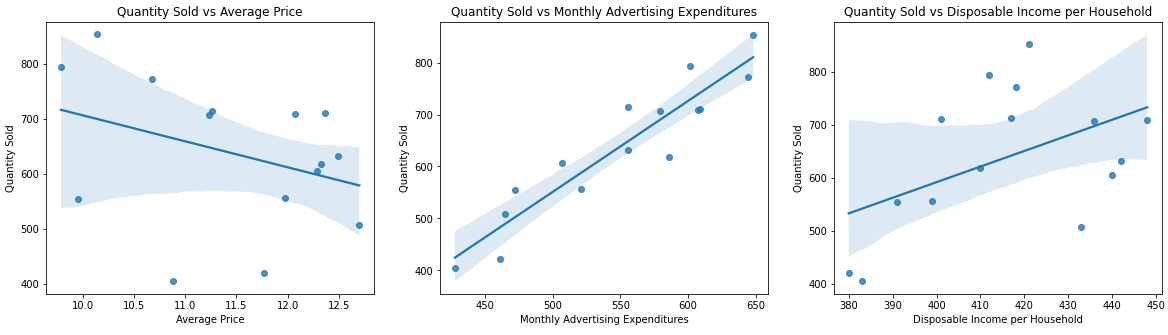

In [210]:
df = pd.read_csv('https://raw.githubusercontent.com/HoGentTIN/dsai-en-labs/main/data/pizzas.csv', sep=";")
df.head()

,Outlet Number,Quantity Sold,Average Price,Monthly Advertising Expenditures,Disposable Income per Household
0,1,85 300,"$10,14",$64 800,$42 100
1,2,40 500,"$10,88",$42 800,$38 300
2,3,61 800,"$12,33",$58 600,$41 000
3,4,50 800,"$12,70",$46 500,$43 300
4,5,60 600,"$12,29",$50 700,$44 000


In [211]:
df['Average Price'] = df['Average Price'].str.replace('$', '')
df['Average Price'] = df['Average Price'].str.replace(',', '.').astype(float)
df['Quantity Sold'] = df['Quantity Sold'].str.replace(' ', '')
df['Monthly Advertising Expenditures'] = df['Monthly Advertising Expenditures'].str.replace('$', '').str.replace(' ', '')
df['Disposable Income per Household'] = df['Disposable Income per Household'].str.replace('$', '').str.replace(' ', '')

df['Quantity Sold'] = df['Quantity Sold'].astype(float)/100
df['Monthly Advertising Expenditures'] = df['Monthly Advertising Expenditures'].astype(float)/100
df['Disposable Income per Household'] = df['Disposable Income per Household'].astype(float)/100
df.head()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """


,Outlet Number,Quantity Sold,Average Price,Monthly Advertising Expenditures,Disposable Income per Household
0,1,853.0,10.14,648.0,421.0
1,2,405.0,10.88,428.0,383.0
2,3,618.0,12.33,586.0,410.0
3,4,508.0,12.70,465.0,433.0
4,5,606.0,12.29,507.0,440.0


<AxesSubplot:xlabel='Average Price', ylabel='Quantity Sold'>

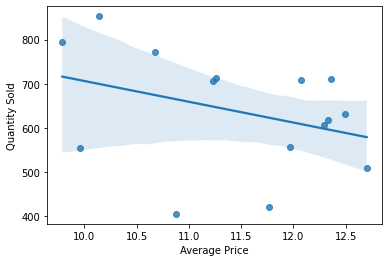

In [212]:
sns.regplot(data=df,  x='Average Price', y='Quantity Sold')

In [217]:
cor = np.corrcoef(df['Average Price'], df['Quantity Sold'])[0][1]
print(f"R = {cor}")

R = -0.3502036809966066


<AxesSubplot:xlabel='Monthly Advertising Expenditures', ylabel='Quantity Sold'>

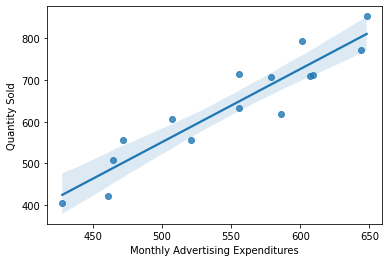

In [213]:
sns.regplot(data=df,  x='Monthly Advertising Expenditures', y='Quantity Sold')

In [216]:
cor = np.corrcoef(df['Monthly Advertising Expenditures'], df['Quantity Sold'])[0][1]
print(f"R = {cor}")

R = 0.933994400229857


<AxesSubplot:xlabel='Disposable Income per Household', ylabel='Quantity Sold'>

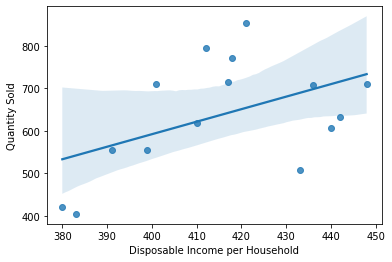

In [214]:
sns.regplot(data=df,  x='Disposable Income per Household', y='Quantity Sold')

In [215]:
cor = np.corrcoef(df['Disposable Income per Household'], df['Quantity Sold'])[0][1]
print(f"R = {cor}")


R = 0.4834832685678616


antwoord: Monthly advertising expenditures kan het sterkst geassocieerd worden met de quantity sold, dit kan je merken aan de R waarde die dicht bij |1| zit, maar ook aan de plot dat alle waarden dicht bij de regressierechte zitten.
